# Name: Ido Terner



In this project, we present an analysis of the video games industry. How the video game industry has evolved over the years? does it increase or decrease its popularity? Which region has the most effect on the video games industry? Which genre and platforms are the most popular and what is the publishers referenced genre. In addition, we tried to find correlations and predicting video games' success by their performance in a specific region.

Our data set contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. The dataset contains over 16000 different games for different platforms, genres and publishers from all over the world.
Fields include:
Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA Sales - Sales in North America (in millions)

EU Sales - Sales in Europe (in millions)

JP Sales - Sales in Japan (in millions)

Other Sales - Sales in the rest of the world (in millions)

Global Sales - Total worldwide sales.


## Import Packages
first of all lets import all the python packages we will need for this project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
sns.set_style("darkgrid")

plt.style.use("ggplot")

## Cleaning The Data
First of all, let's open the our data set

In [4]:
data = pd.read_csv("vgsales.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA Sales      16598 non-null  float64
 7   EU Sales      16598 non-null  float64
 8   JP Sales      16598 non-null  float64
 9   Other Sales   16598 non-null  float64
 10  Global Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


As we can see, there is a null rows in our dataset, therefore, we will need to remove them.

In [5]:
data = data.dropna()
print(data.head())
print(data.info())
print(data.shape)

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA Sales  EU Sales  JP Sales  Other Sales  Global Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

Now we don't have any rows with null values so we are ready to start our analysis

### The Evolotion Of The Gaming Industry
In order to check whether the gmaing industry increase over the years we present a plot of the total game sold in each year globly

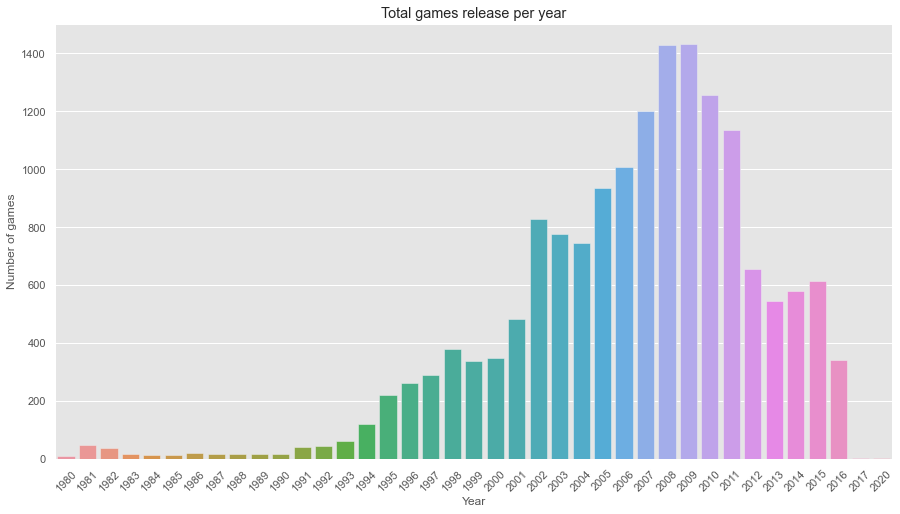

In [6]:
# get a list of all the release years from the data set
years = data.Year.unique()
years.sort()

# creating the plot
plt.figure(figsize=(15, 8))
total_games = []
for year in years:
    total_games.append(data[data["Year"] == year].shape[0])
df = pd.DataFrame()
df["Year"] = np.array(years, np.int)
df["Games"] = total_games
plot = sns.barplot(x="Year", y="Games", data=df)
plot.set_title("Total games release per year")
plot.set_ylabel("Number of games")
plot.set_xlabel("Year")
plt.xticks(rotation=45)
plt.show()

After watching the plot, we can infer several things about the gaming industry:

1) The release amount of the video game increases fastly after 1995.

2) The release amount reaches top around 2009, which is around 1400 games
per year (almost 10% from out total data).

3) After 2011, the game amount reduces a lot about 40% comparing to that in 2011.

### Which Region Has The Most Influence?

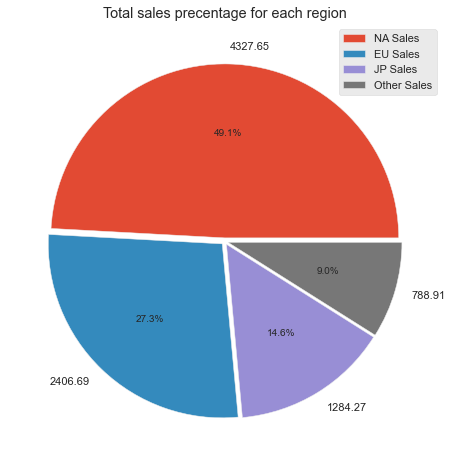

In [7]:
# The number outside the pie chart represent the total sales (in million) for each region
plt.figure(figsize=(15, 8))
x = []
labels = ["NA Sales", "EU Sales", "JP Sales", "Other Sales"]
for region in labels:
    x.append("{:.2f}".format(data[region].sum()))
plt.pie(x=x, autopct="%.1f%%",
        labels=x, explode=[0.02]*len(x))
plt.legend(labels)
plt.title("Total sales precentage for each region")
plt.show()

From this figure, we can clearly see that North America is the biggest market of video game which occupies almost 50% of the market.

### Publisher's Preference In Terms Of Genre
In this section we will analyze if there is a genre preference for each publisher or they release game in different genre randomly.

First of all, we prepare the data for the plot by grouping all the games that have the same genre and publisher and save the number of different games.

In [8]:
Genre_Publisher = data['Publisher'].groupby(
    data['Genre']).value_counts().reset_index('Genre')
Genre_Publisher.columns = ['Genre', 'Amount']
Genre_Publisher.reset_index(inplace=True)
Genre_Publisher.sort_values(by='Amount', ascending=False, inplace=True)
print(Genre_Publisher.head())

                         Publisher   Genre  Amount
1541               Electronic Arts  Sports     554
0                       Activision  Action     308
1542  Konami Digital Entertainment  Sports     279
1               Namco Bandai Games  Action     247
2                              THQ  Action     193


Saving the top 10 publishers

In [9]:
sales_publishers_global_10 = Genre_Publisher["Publisher"][:10].to_list()
print(sales_publishers_global_10)

['Electronic Arts', 'Activision', 'Konami Digital Entertainment', 'Namco Bandai Games', 'THQ', 'Ubisoft', 'Electronic Arts', 'Electronic Arts', 'Activision', 'Capcom']


Now we will prepare the data for the plot.

To do that we will use the following function:

In [10]:
def publisher_genre_preparation(data):
    d = {"Publisher": [], "Genre": [], "Amount": []}
    publishers = data.index.unique()
    amount = 0
    for genre in data.Genre.unique():
        new_data = data[data["Genre"] == genre]
        current = list(new_data.index.unique())
        for publisher in publishers:
            if publisher in current:
                amount = new_data.loc[publisher]["Amount"]
            else:
                amount = 0
            d["Publisher"].append(publisher)
            d["Genre"].append(genre)
            d["Amount"].append(amount)
    return pd.DataFrame(d)

In [11]:
# prepare the data for the plot
Genre_Publisher_10 = Genre_Publisher[Genre_Publisher['Publisher'].isin(
    sales_publishers_global_10)]
Genre_Publisher_top = Genre_Publisher_10.groupby('Publisher')['Amount'].sum(
).reset_index().sort_values('Amount', ascending=False)
Publisher_top = Genre_Publisher_top['Publisher'].tolist()
Genre_Publisher_10 = Genre_Publisher_10.set_index(
    'Publisher').T[Publisher_top].T

df = publisher_genre_preparation(Genre_Publisher_10)
print(df.head())

                      Publisher   Genre  Amount
0               Electronic Arts  Sports     554
1                    Activision  Sports     142
2            Namco Bandai Games  Sports      50
3                       Ubisoft  Sports      71
4  Konami Digital Entertainment  Sports     279


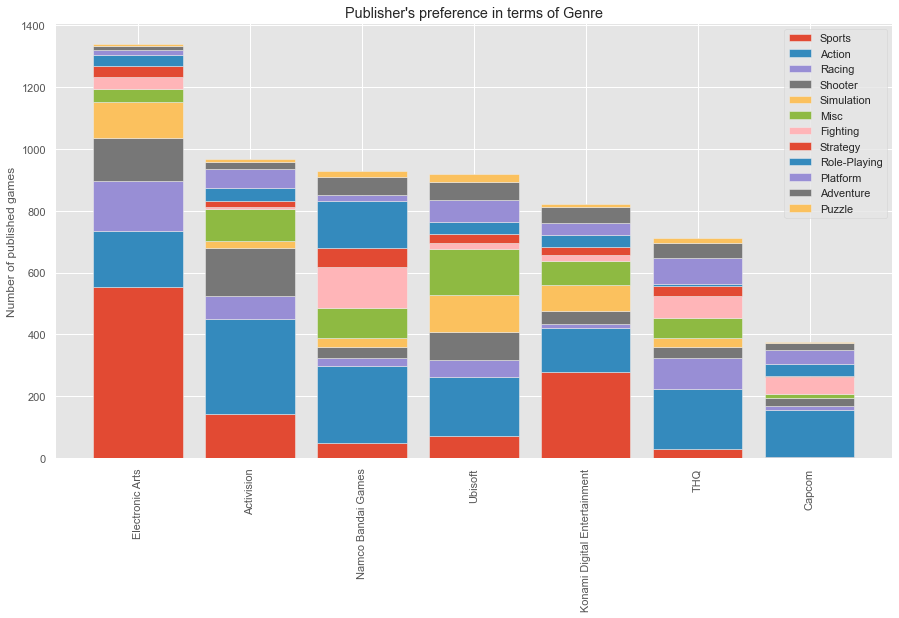

In [12]:
# The plot
plt.figure(figsize=(15, 8))

b = np.zeros(len(df.Publisher.unique()))
for genre in df.Genre.unique():
    new_data = df[df["Genre"] == genre]
    plt.bar(new_data["Publisher"].values, new_data["Amount"].values, bottom=b)
    b += new_data["Amount"].values

plt.legend(df.Genre.unique())
plt.title("Publisher's preference in terms of Genre")
plt.ylabel("Number of published games")
plt.xticks(rotation=90)
plt.show()

From this plot we could infer several things:

1) The figure shows that for those top publishers, Action and Sports are their most preferred genre.

2) EA produces more sports game which is in line with their popularity,
the same as the action games for Activision.

3) In terms of the Role-Playing games, Japanese publishers produce most of them, within which Namco Bandai
and Nintendo is the top one.

### The Preferred Platform and Genre

In this section we are willing to find out which platform and genre are the most popular in each region.

First of all we need to prepare the data for the plot, using the following function:

In [13]:
def prepare_data_for_bar_plot(data, cols, name):
    """
    The function prepare the data for the bar plot.
    @param: data - the dataset
    @param: cols - list of the x-axis value (for example platform)
    @param: name - the name of the column in the data (for example Platform)
    return value - DataFrame object with the orgenized data
    """
    regions = ["NA Sales", "EU Sales", "JP Sales", "Other Sales"]
    d = {"y": [], "region": [], "x": []}
    for c in cols:
        new_data = data[data[name] == c]
        for region in regions:
            d["y"].append(c)
            d["region"].append(region)
            d["x"].append(new_data[region].sum())

    df = pd.DataFrame(d)
    return df

We will start with the platform plot, and then the genre

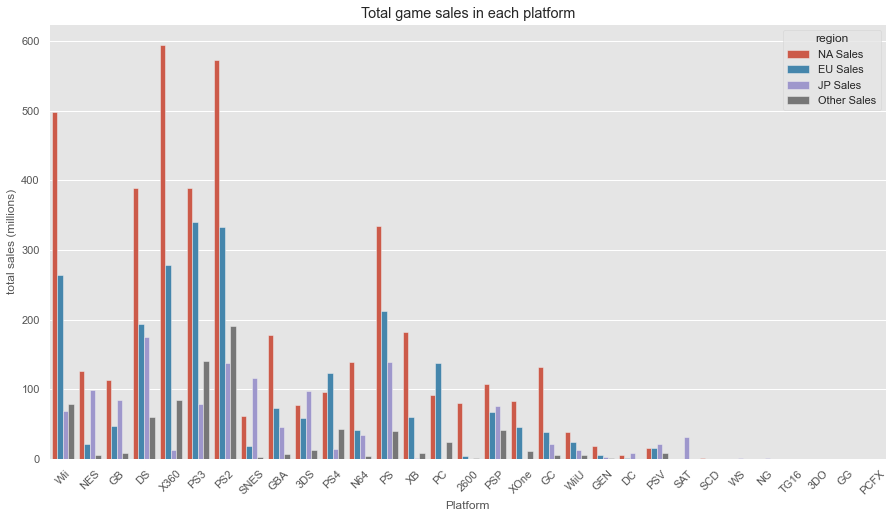

In [14]:
# The platform plot

# get the list of all the platforms from the data set
platforms = data.Platform.unique()

# plotting
plt.figure(figsize=(15, 8))
df = prepare_data_for_bar_plot(data, platforms, "Platform")
plot = sns.barplot(x="y", hue="region", y="x", data=df)
plot.set_title("Total game sales in each platform")
plot.set_ylabel("total sales (millions)")
plot.set_xlabel("Platform")
plt.xticks(rotation=45)
plt.show()

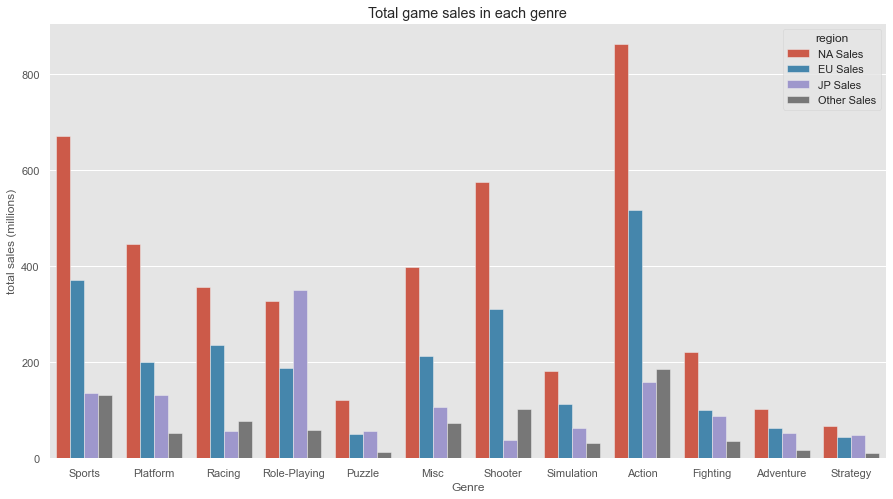

In [15]:
# The Genre plot

# get the list of all the genres from the data set
genres = data.Genre.unique()

# plotting
plt.figure(figsize=(15, 8))
df = prepare_data_for_bar_plot(data, genres, "Genre")
plot = sns.barplot(x="y", hue="region", y="x", data=df)
plot.set_title("Total game sales in each genre")
plot.set_ylabel("total sales (millions)")
plot.set_xlabel("Genre")
plt.show()

Conclusions from the above figures:

1) North America's favorite gaming platforms are PS2 and XBOX360 with almost 600 million sales. Europe's favorite gaming platforms are PS2 and PS3 with almost 350 million sales. Japan's preferred platform is DS with almost 200 million sales. The rest of the world's preferred platform is the PS2 with almost 200 million sales.

2) North America, Europe, and the rest of the world share their preferred genre which is Action with 800, 450, and 200 million sales respectively, where Japan's favorite genre is Role-Playing with almost 400 million sales.

### Predicting Game Success in the world
In this section, we will try to check whether or not there is a correlation between the game information such as the game rank, release year, and their selling information. 

First of all, we want to see the correlation heat map to check if there is a correlation between some fields

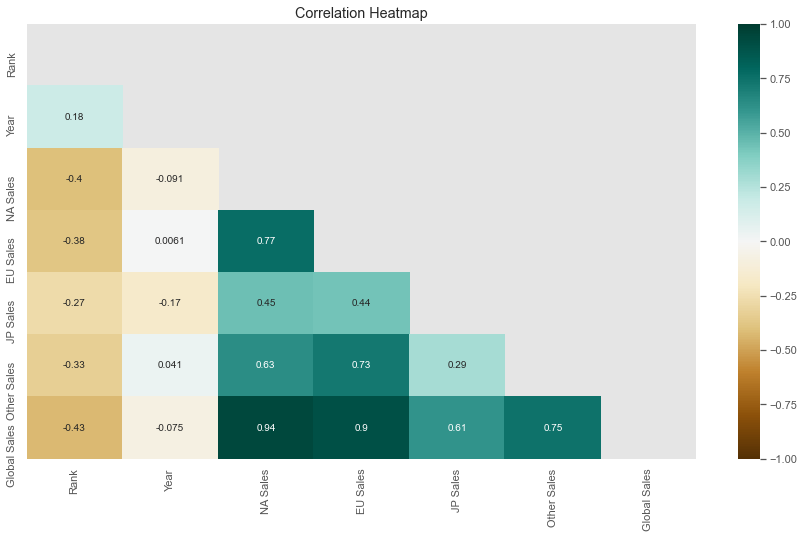

In [16]:
# correlation heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
plot = sns.heatmap(data.corr(), vmin=-1, vmax=1,
                   annot=True, cmap='BrBG', mask=mask)
plot.set_title("Correlation Heatmap")
plt.xticks(rotation=90)
plt.show()

As we can see, there is a high correlation with the North America and Europe with the Global Sales. To preform the linear regression we need first to import the model:

In [23]:
from sklearn.linear_model import LinearRegression

Now we will clear the data and convert the genre and platform fields to an integer

In [17]:
# open the data set once again
data = pd.read_csv("vgsales.csv")

# cleaning the data
data = data.dropna()

# delete unnecessary variables for the Linear Regression
data.drop(["Rank", "Name", "Year", "Publisher"], axis=1, inplace=True)

# converting categorical variables to numeric variables
df = pd.get_dummies(data[["Platform", "Genre"]])

df.drop(["Platform_2600", "Genre_Misc"], axis=1, inplace=True)
print(df.head())

   Platform_3DO  Platform_3DS  Platform_DC  Platform_DS  Platform_GB  \
0             0             0            0            0            0   
1             0             0            0            0            0   
2             0             0            0            0            0   
3             0             0            0            0            0   
4             0             0            0            0            1   

   Platform_GBA  Platform_GC  Platform_GEN  Platform_GG  Platform_N64  ...  \
0             0            0             0            0             0  ...   
1             0            0             0            0             0  ...   
2             0            0             0            0             0  ...   
3             0            0             0            0             0  ...   
4             0            0             0            0             0  ...   

   Genre_Adventure  Genre_Fighting  Genre_Platform  Genre_Puzzle  \
0                0            

A new data set is created by combining the data set with the newly created variables. The old categorical variables that have been transformed are removed from the data set because they are no longer needed

In [18]:
final_df = pd.concat([data, df], axis=1)
final_df.drop(["Platform", "Genre"], axis=1, inplace=True)
print(final_df.head())

   NA Sales  EU Sales  JP Sales  Other Sales  Global Sales  Platform_3DO  \
0     41.49     29.02      3.77         8.46         82.74             0   
1     29.08      3.58      6.81         0.77         40.24             0   
2     15.85     12.88      3.79         3.31         35.82             0   
3     15.75     11.01      3.28         2.96         33.00             0   
4     11.27      8.89     10.22         1.00         31.37             0   

   Platform_3DS  Platform_DC  Platform_DS  Platform_GB  ...  Genre_Adventure  \
0             0            0            0            0  ...                0   
1             0            0            0            0  ...                0   
2             0            0            0            0  ...                0   
3             0            0            0            0  ...                0   
4             0            0            0            1  ...                0   

   Genre_Fighting  Genre_Platform  Genre_Puzzle  Genre_Racing 

We will start with Europe

Now the data is ready for the linear regression

First of all we will display our data


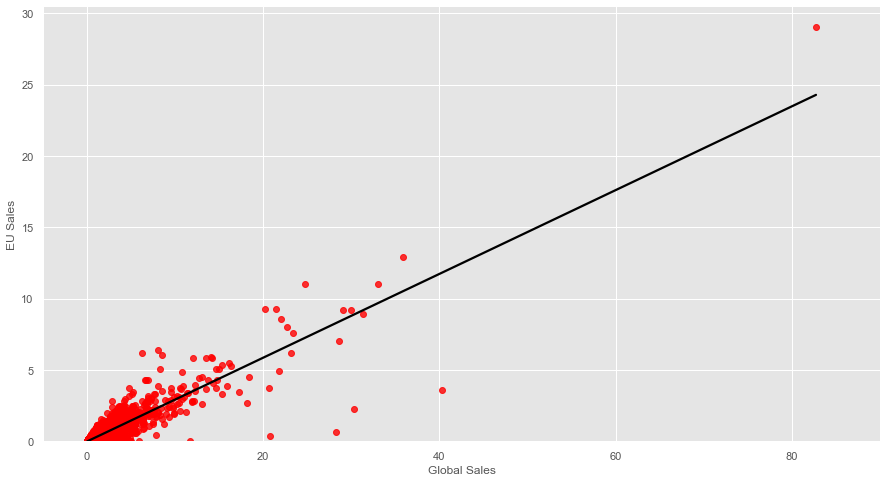

In [19]:
plt.figure(figsize=(15, 8))
g = sns.regplot(x="Global Sales", y="EU Sales", data=final_df,
                ci=None, color="black", scatter_kws={"color": "red"})
plt.xlim(-5, 90)
plt.ylim(bottom=0)
plt.show()

We can clearly see one outlier in the "EU Sales". Let's analyze her value


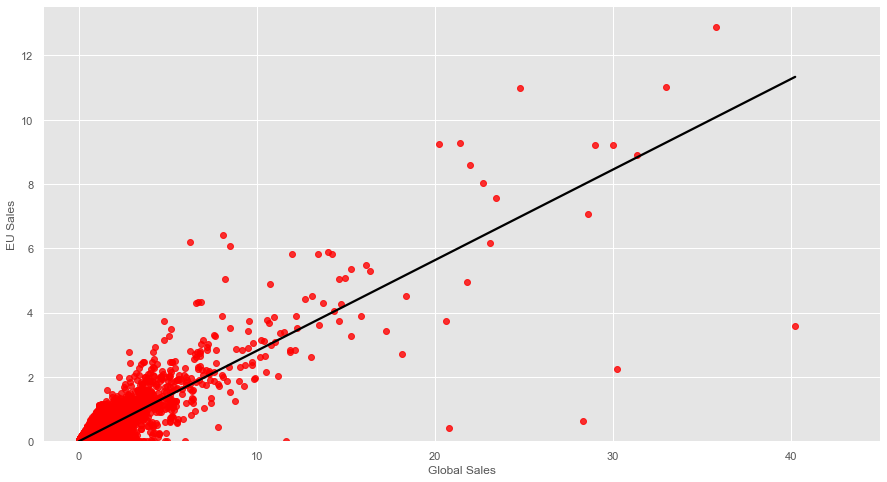

In [21]:
# remove the outlier points
outlier_data = final_df[final_df["EU Sales"] <= 15]

# plotting
plt.figure(figsize=(15, 8))
g = sns.regplot(x="Global Sales", y="EU Sales", data=outlier_data,
                ci=None, color="black", scatter_kws={"color": "red"})
plt.xlim(-2, 45)
plt.ylim(bottom=0)
plt.show()

Analyzing the data withot the outlier points

In [24]:
# now we choose our dependent and independent variables
X = outlier_data[["EU Sales"]]
y = outlier_data["Global Sales"]

# To process the data, we will create a Linear Regression model with our X,Y variables
lg = LinearRegression()
model = lg.fit(X, y)

# checking the model's score
print("Our Linear Regression model score:", model.score(X, y))

# after creating the model, we will let him predict the Global Sales of a certain game given his EU Sales
est = [[12], [30], [50]]
for e in est:
    print(
        f"The model Global Sales value prediction for game EU Sales {e[0]} is: {model.predict([[e[0]]])}")

Our Linear Regression model score: 0.7786223339800742
The model Global Sales value prediction for game EU Sales 12 is: [33.29095218]
The model Global Sales value prediction for game EU Sales 30 is: [83.0285543]
The model Global Sales value prediction for game EU Sales 50 is: [138.29255666]


Now we will preform the same for the North America

First of all let's display our data


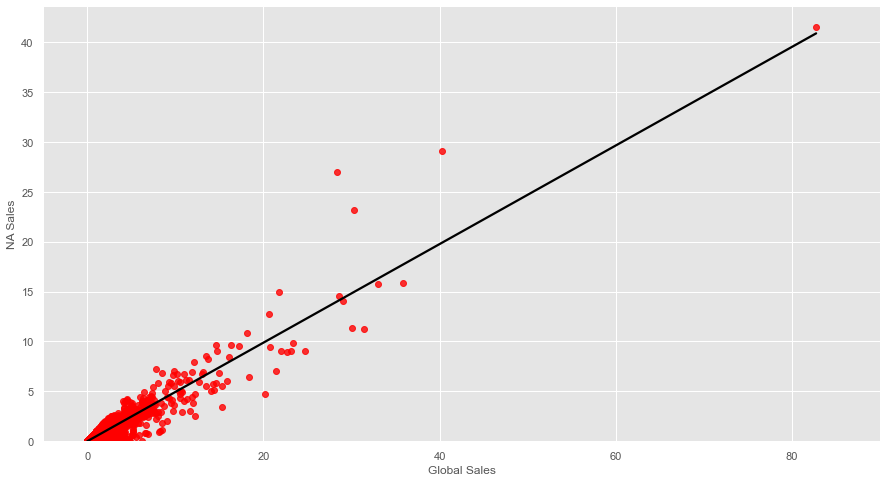

In [25]:
plt.figure(figsize=(15, 8))
g = sns.regplot(x="Global Sales", y="NA Sales", data=final_df,
                ci=None, color="black", scatter_kws={"color": "red"})
plt.xlim(-5, 90)
plt.ylim(bottom=0)
plt.show()

We can clearly see one outlier in the "NA Sales". Let's analyze her value


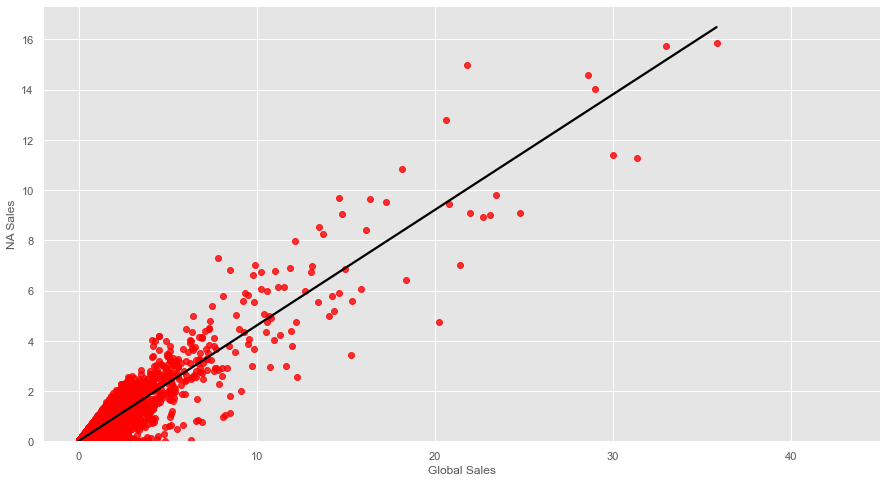

In [26]:
# removing the outlier points
outlier_data = final_df[final_df["NA Sales"] <= 20]

# plotting
plt.figure(figsize=(15, 8))
g = sns.regplot(x="Global Sales", y="NA Sales", data=outlier_data,
                ci=None, color="black", scatter_kws={"color": "red"})
plt.xlim(-2, 45)
plt.ylim(bottom=0)
plt.show()

Analyzing the data withot the outlier points

In [27]:
# now we choose our dependent and independent variables
X = outlier_data[["NA Sales"]]
y = outlier_data["Global Sales"]

# To process the data, we will create a Linear Regression model with our X,Y variables
lg = LinearRegression()
model = lg.fit(X, y)

# checking the model's score
print("Our Linear Regression model score:", model.score(X, y))

# after creating the model, we will let him predict the Global Sales of a certain game given his EU Sales
est = [[12], [30], [50]]
for e in est:
    print(
        f"The model Global Sales value prediction for game NA Sales {e[0]} is: {model.predict([[e[0]]])}")

Our Linear Regression model score: 0.8758214848913872
The model Global Sales value prediction for game NA Sales 12 is: [22.89182909]
The model Global Sales value prediction for game NA Sales 30 is: [57.17262566]
The model Global Sales value prediction for game NA Sales 50 is: [95.26239963]


## Final Conclusion From This Project

1) The gaming industry has fastly grown over the years although there is a minor decline in the recent 5 years.

2) North America is the biggest region in terms of game selling with over 4.3 billion sales.

3) Publishers tend to focus on one or two genres rather than release games for all the genres.

4) The most popular genres are Action and Sports, And the most popular platform is PS2.

5) The North America and Europe sales correlate with the global success of the game indicating that you can predict the success of a certain game based on their success in North America or Europe.